- n = [800, 1200, 2000] / 400

- indp = N
- z_dis = gaussian
- noise_dis = t
- dz=2,3,5,10
- alpha=2

In [3]:
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from ecit import *


def ecit_simu(n_list=[400,800,2000,4000],
              t=100,
              cit=kcit,
              ensembles=[(p_alpha175,1), (p_alpha175,2), (p_alpha175,400)],
              show_progress=True,
              dz=1,n_indp='N',z_dis='gaussian',noise_dis='gaussian',noise_std=0.3,fun1=None,fun2=None):
    
    results = []

    for p_ensemble, k in ensembles:

        if show_progress: print(f"Ensemble (k={k}, {p_ensemble.__name__})") if k>1 else print(f"Default (k=1)")

        eI = [0]*len(n_list)
        eII = [0]*len(n_list)
        tim = [0]*len(n_list)

        for i, n in enumerate(n_list):

            start_time = time.time()
            iteration_loop = tqdm(range(t), desc=f"n={n}", leave=True, dynamic_ncols=True) if show_progress else range(t)
            for sed in iteration_loop:
                np.random.seed(sed)
                random.seed(sed)
                dataI = np.hstack((generate_samples(n=n,dz=dz,indp='C',z_dis=z_dis, noise_dis=noise_dis,noise_std=noise_std,
                                                    fun1=fun1, fun2=fun1)))
                dataII = np.hstack((generate_samples(n=n,dz=dz,indp=n_indp,z_dis=z_dis, noise_dis=noise_dis,noise_std=noise_std,
                                                     fun1=fun1, fun2=fun1)))
                obj_ECIT = ECIT(dataI, cit, p_ensemble, k if k<100 else int(n/k))
                pI = obj_ECIT([0], [1], list(range(2,dz+2)))
                obj_ECIT = ECIT(dataII, cit, p_ensemble, k if k<100 else int(n/k))
                pII = obj_ECIT([0], [1], list(range(2,dz+2)))
                if pI<0.05:
                    eI[i] += 1
                if pII>0.05:
                    eII[i] += 1

            end_time = time.time()
            tim[i] = end_time - start_time
            eI[i] = eI[i]/t
            eII[i] = eII[i]/t

        results.append([eI, eII, tim])

    return results




def show_results(results, ensembles, n_list):
    dir = {}
    for (p_ensemble, k), result in zip(ensembles, results):
        key_name = f"Ensemble (k={k}, {p_ensemble.__name__})" if k > 1 else f"Default (k=1)"
        dir[key_name] = result

    fig, axes = plt.subplots(2, 2, figsize=(16, 10), dpi=300, sharex=True)
    (ax_eI, ax_eII), (ax_eSum, ax_tim) = axes

    for label, result in dir.items():
        eI, eII, tim = result
        eSum = np.array(eI) + np.array(eII)

        ax_eI.plot(n_list, eI, label=label)
        ax_eII.plot(n_list, eII)
        ax_eSum.plot(n_list, eSum)
        ax_tim.plot(n_list, tim)

    ax_eI.set_title("Error I")
    ax_eI.set_ylabel("Error Rate")

    ax_eII.set_title("Error II")

    ax_eSum.set_title("Error I + Error II")
    ax_eSum.set_xlabel("Sample Size (n)")   
    ax_eSum.set_ylabel("Error Rate")


    ax_tim.set_title("Execution Time")
    ax_tim.set_ylabel("Time (s)")
    ax_tim.set_xlabel("Sample Size (n)")

    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=12)

    ax_tim.set_xticks(n_list)
    ax_eSum.set_xticks(n_list)

    plt.tight_layout()
    plt.show()

In [4]:
n_list = [800, 1200, 2000]
ensembles = [(p_alpha2, 1), (p_alpha2, 400)]
t = 1000
cit = rcit

Default (k=1)


n=2000: 100%|██████████| 1000/1000 [05:06<00:00,  3.27it/s]


Ensemble (k=400, p_alpha2)


n=2000: 100%|██████████| 1000/1000 [20:46<00:00,  1.25s/it]


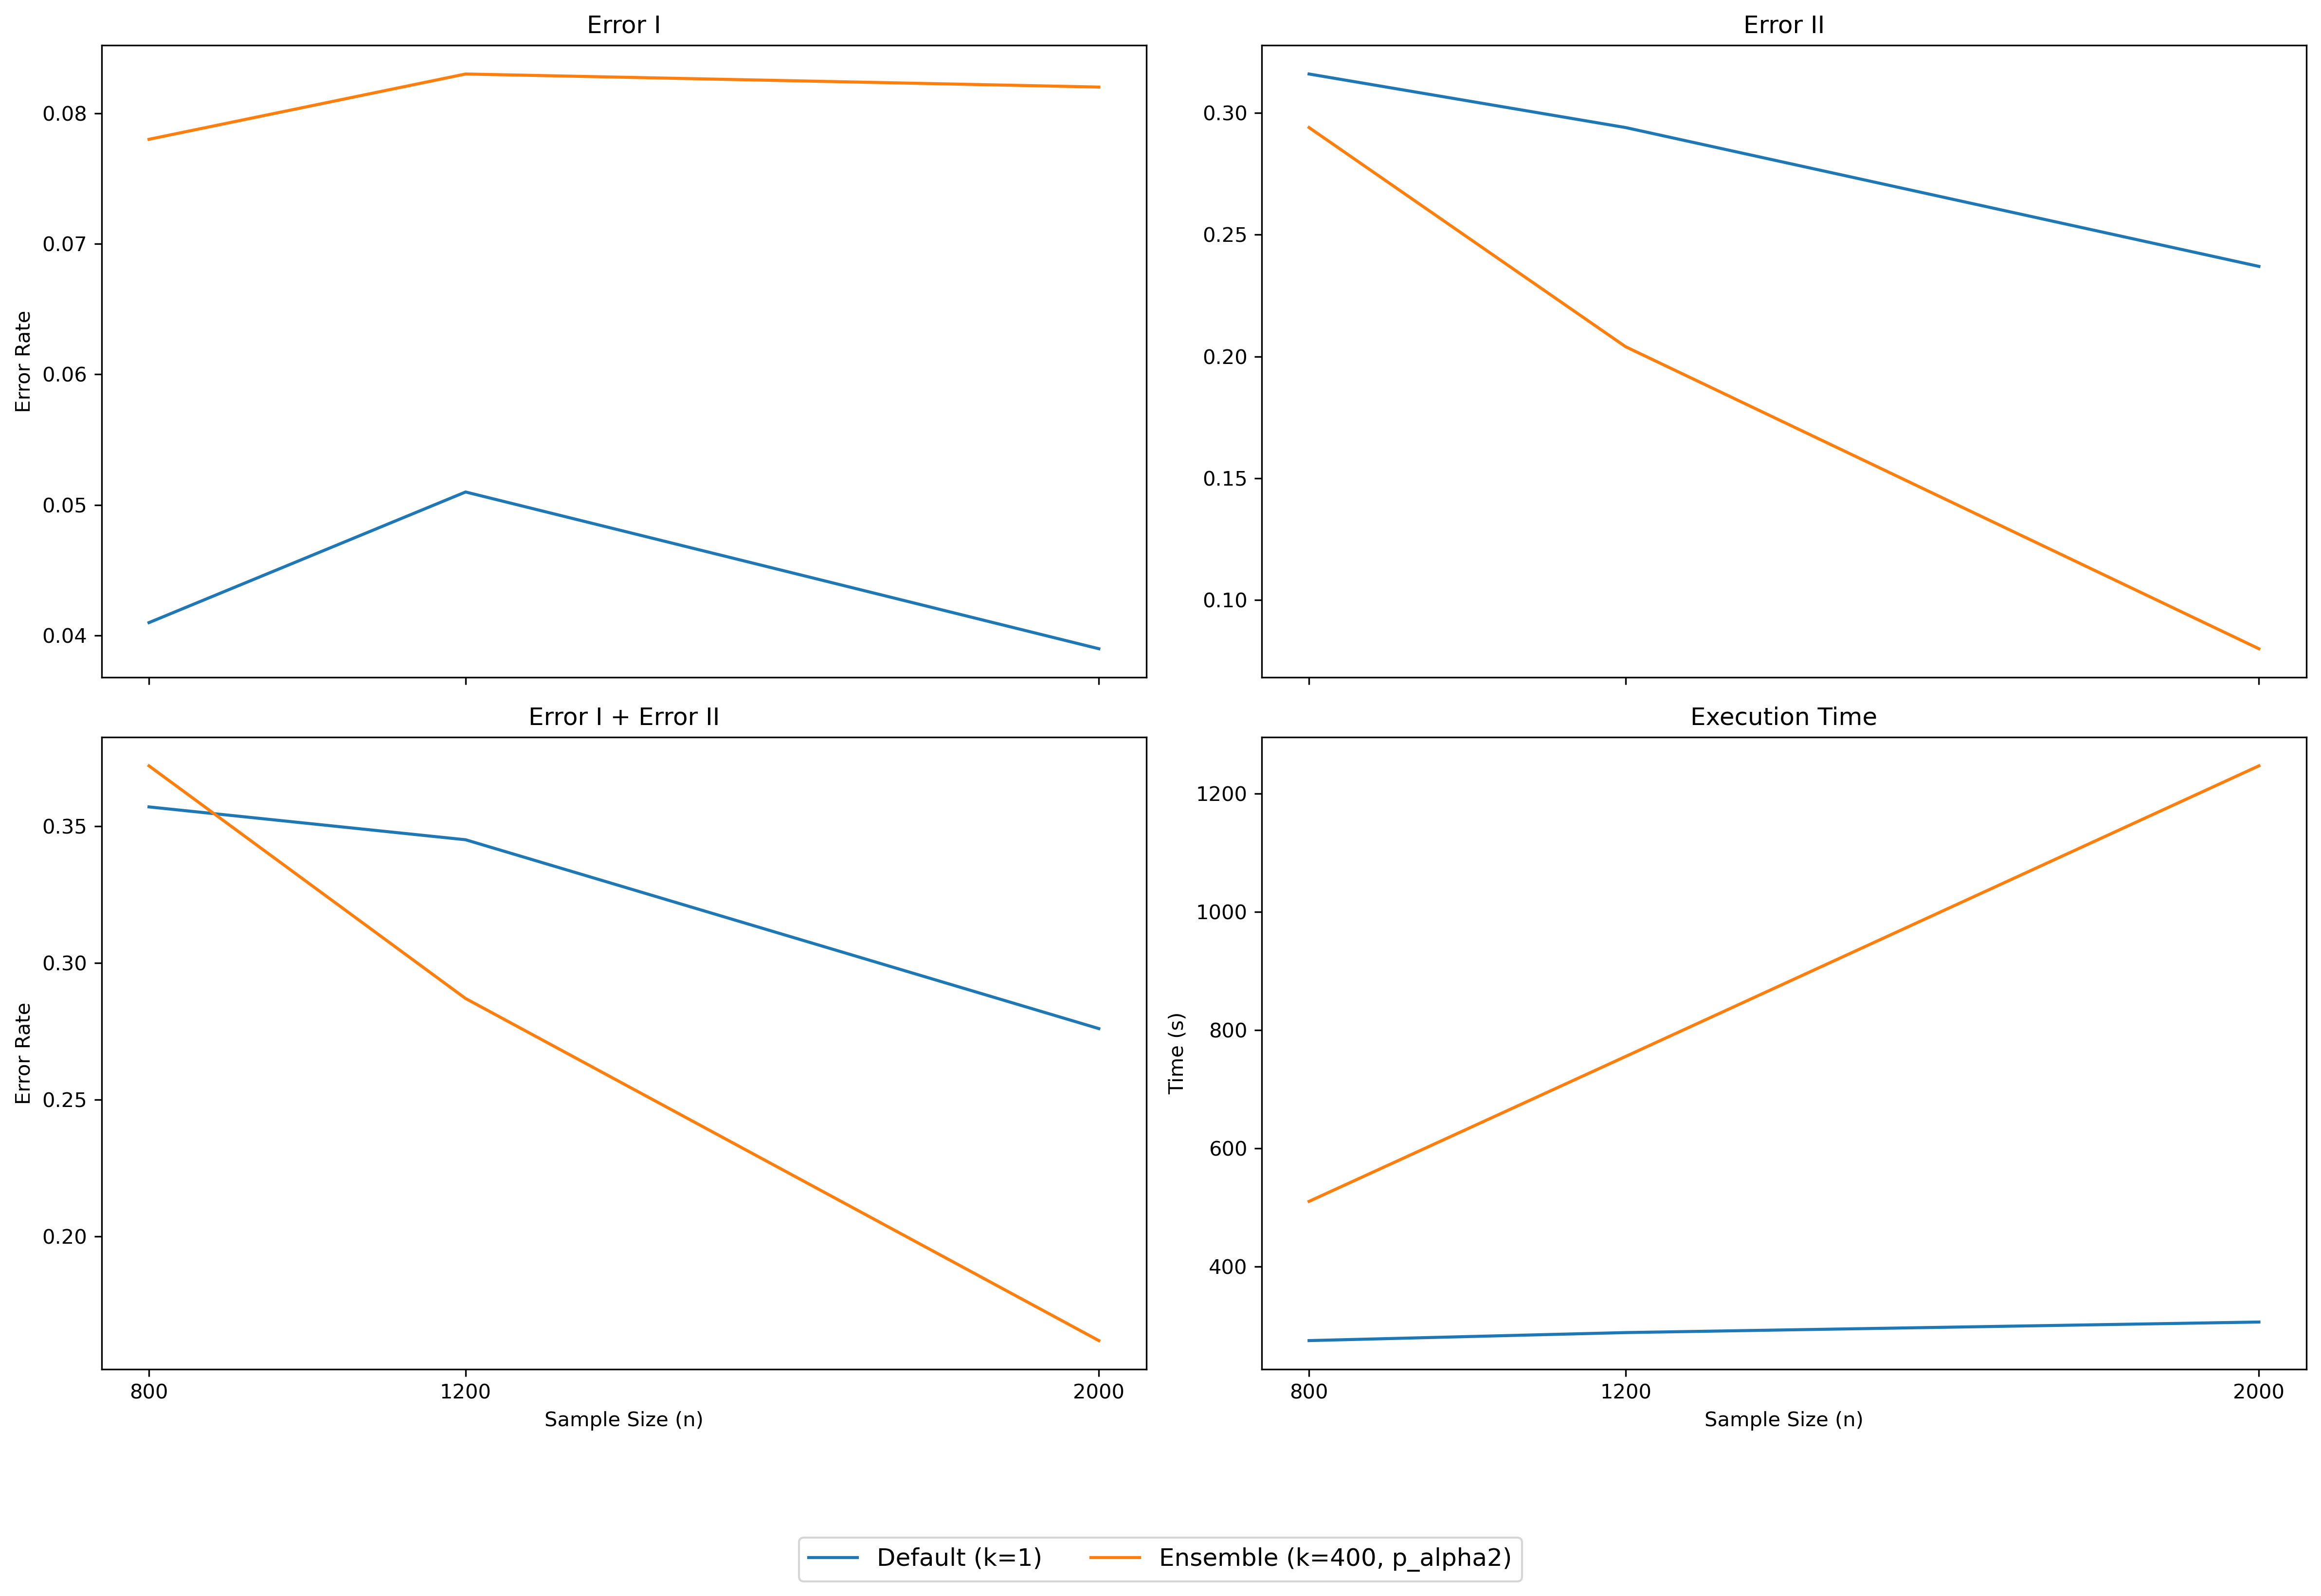

[[[0.041, 0.051, 0.039],
  [0.316, 0.294, 0.237],
  [274.6140789985657, 288.18702006340027, 306.0027940273285]],
 [[0.078, 0.083, 0.082],
  [0.294, 0.204, 0.08],
  [510.0981969833374, 755.2888467311859, 1246.8072168827057]]]

In [5]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=2,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=2000: 100%|██████████| 1000/1000 [05:00<00:00,  3.33it/s]


Ensemble (k=400, p_alpha2)


n=2000: 100%|██████████| 1000/1000 [20:51<00:00,  1.25s/it]


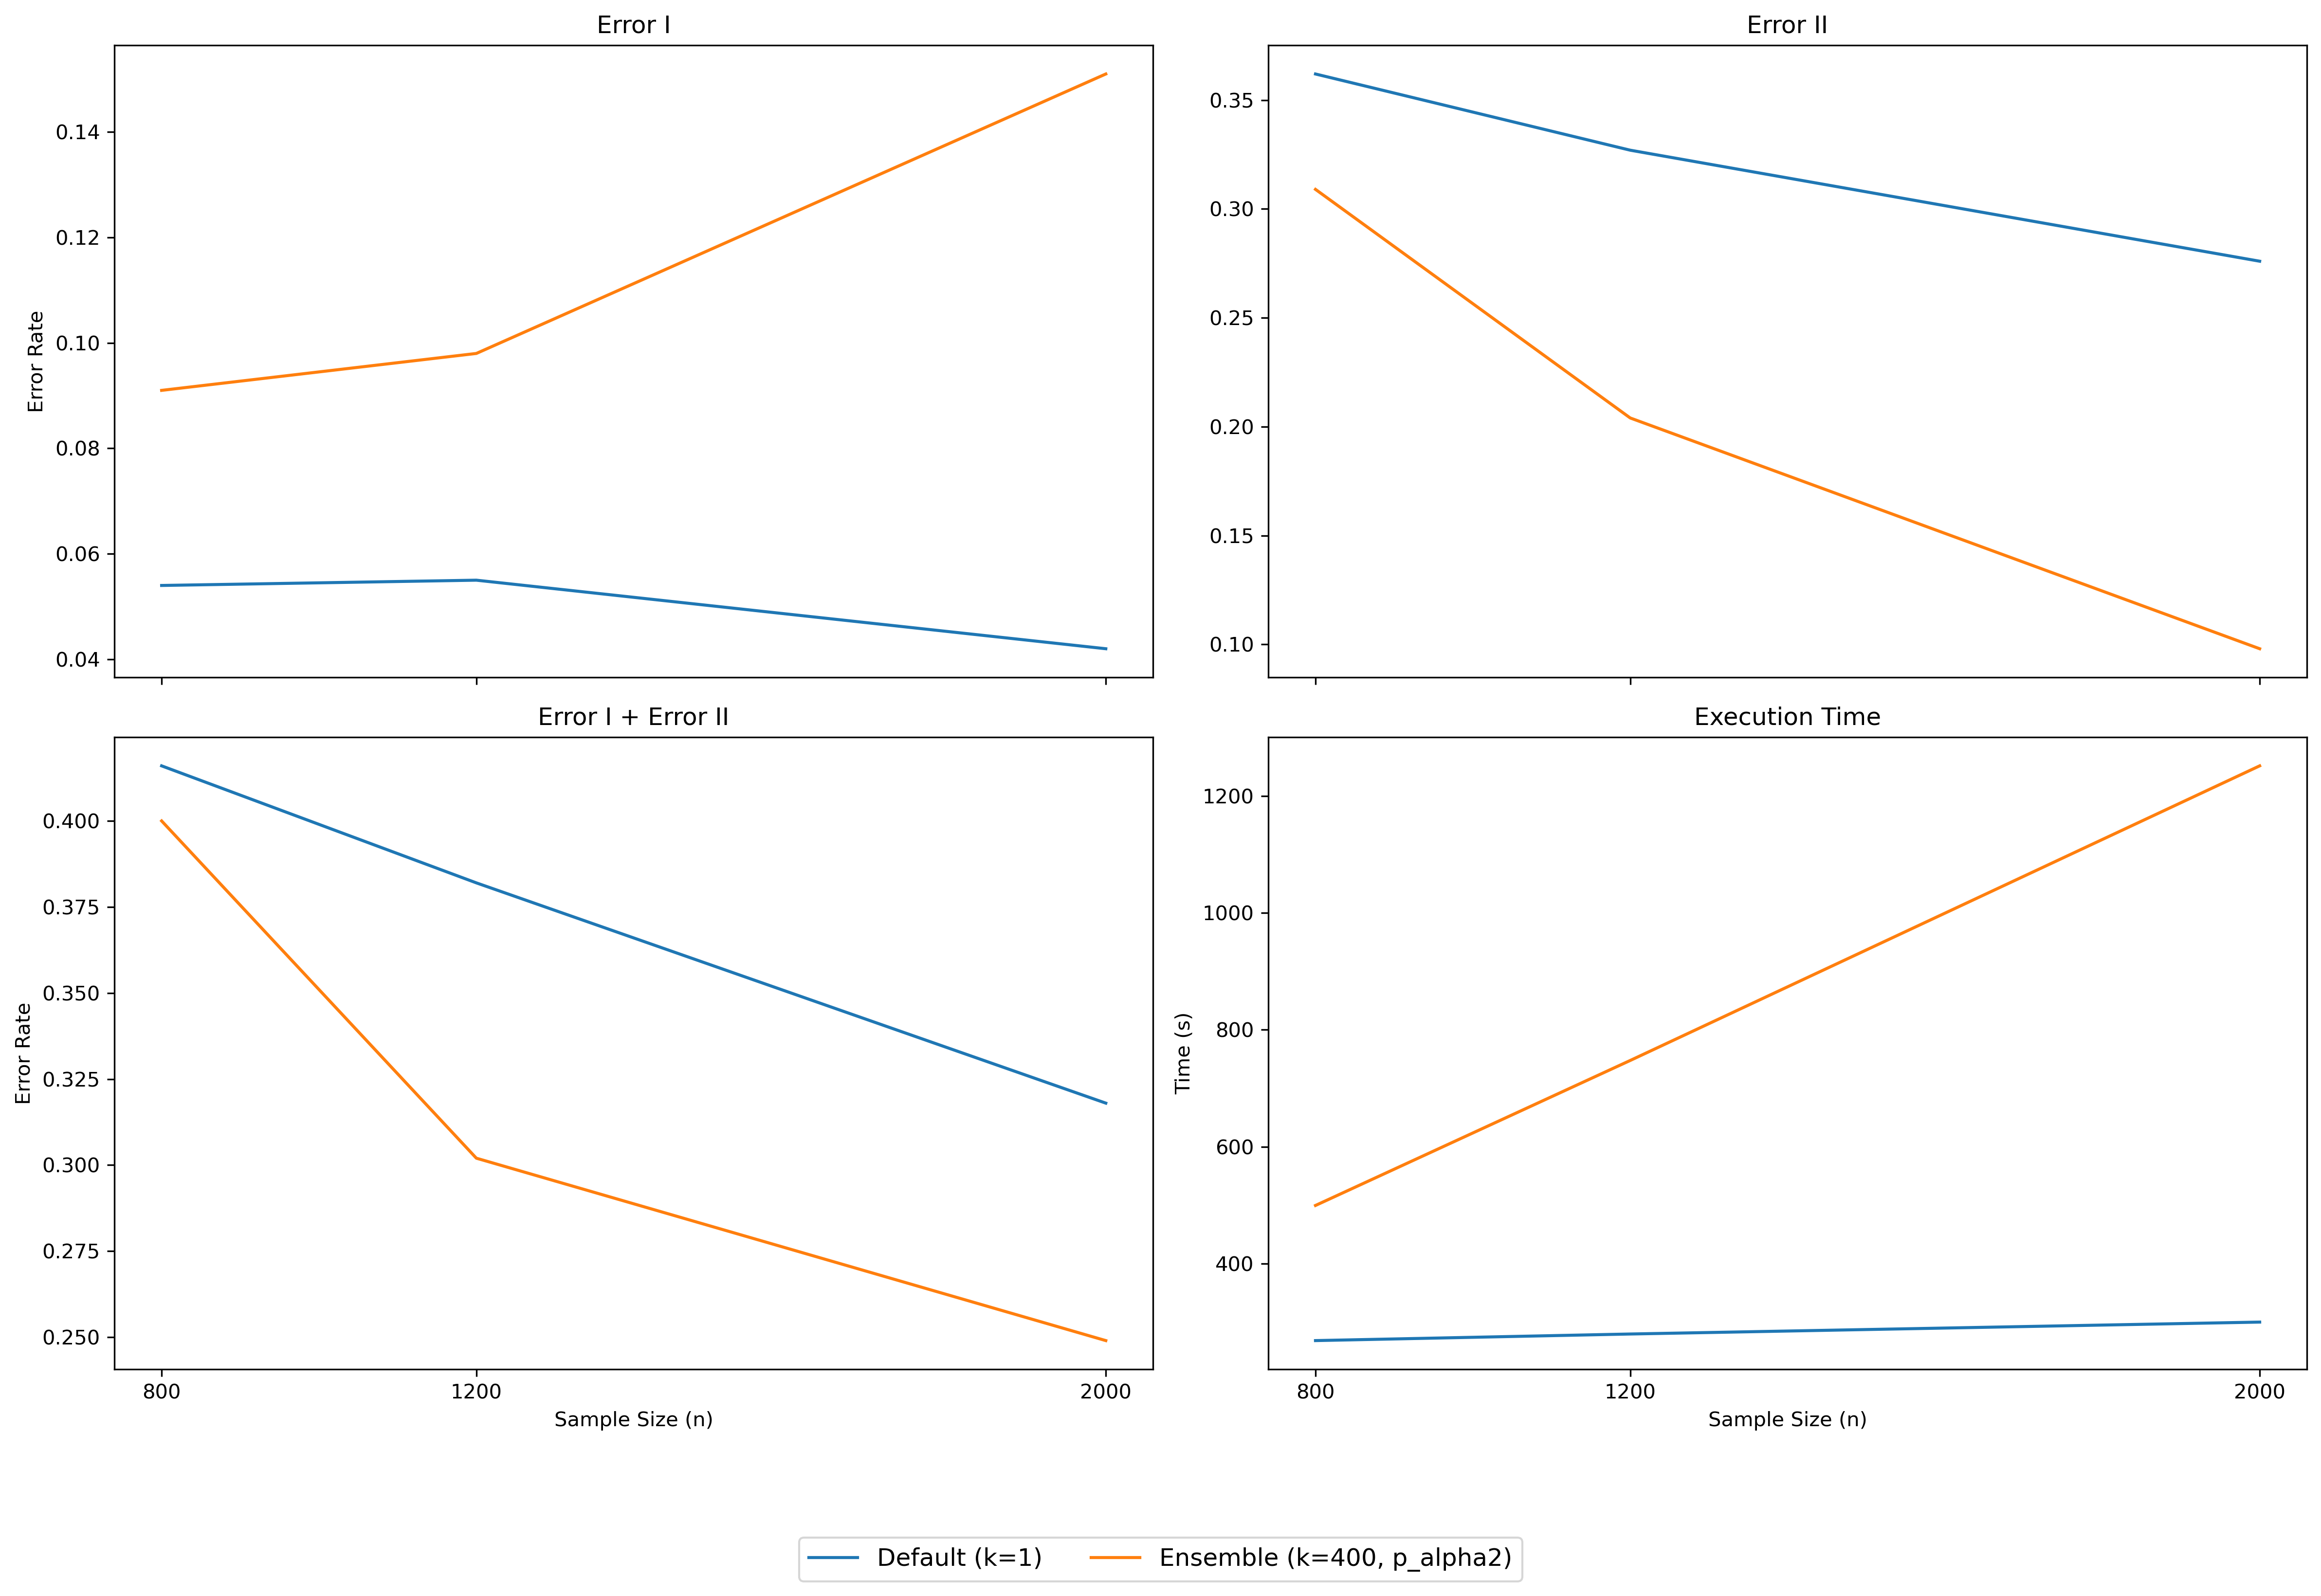

[[[0.054, 0.055, 0.042],
  [0.362, 0.327, 0.276],
  [268.341148853302, 279.6136031150818, 300.00099205970764]],
 [[0.091, 0.098, 0.151],
  [0.309, 0.204, 0.098],
  [499.5437650680542, 747.6058702468872, 1251.6708941459656]]]

In [6]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=3,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=2000: 100%|██████████| 1000/1000 [05:00<00:00,  3.32it/s]


Ensemble (k=400, p_alpha2)


n=2000: 100%|██████████| 1000/1000 [20:55<00:00,  1.26s/it]


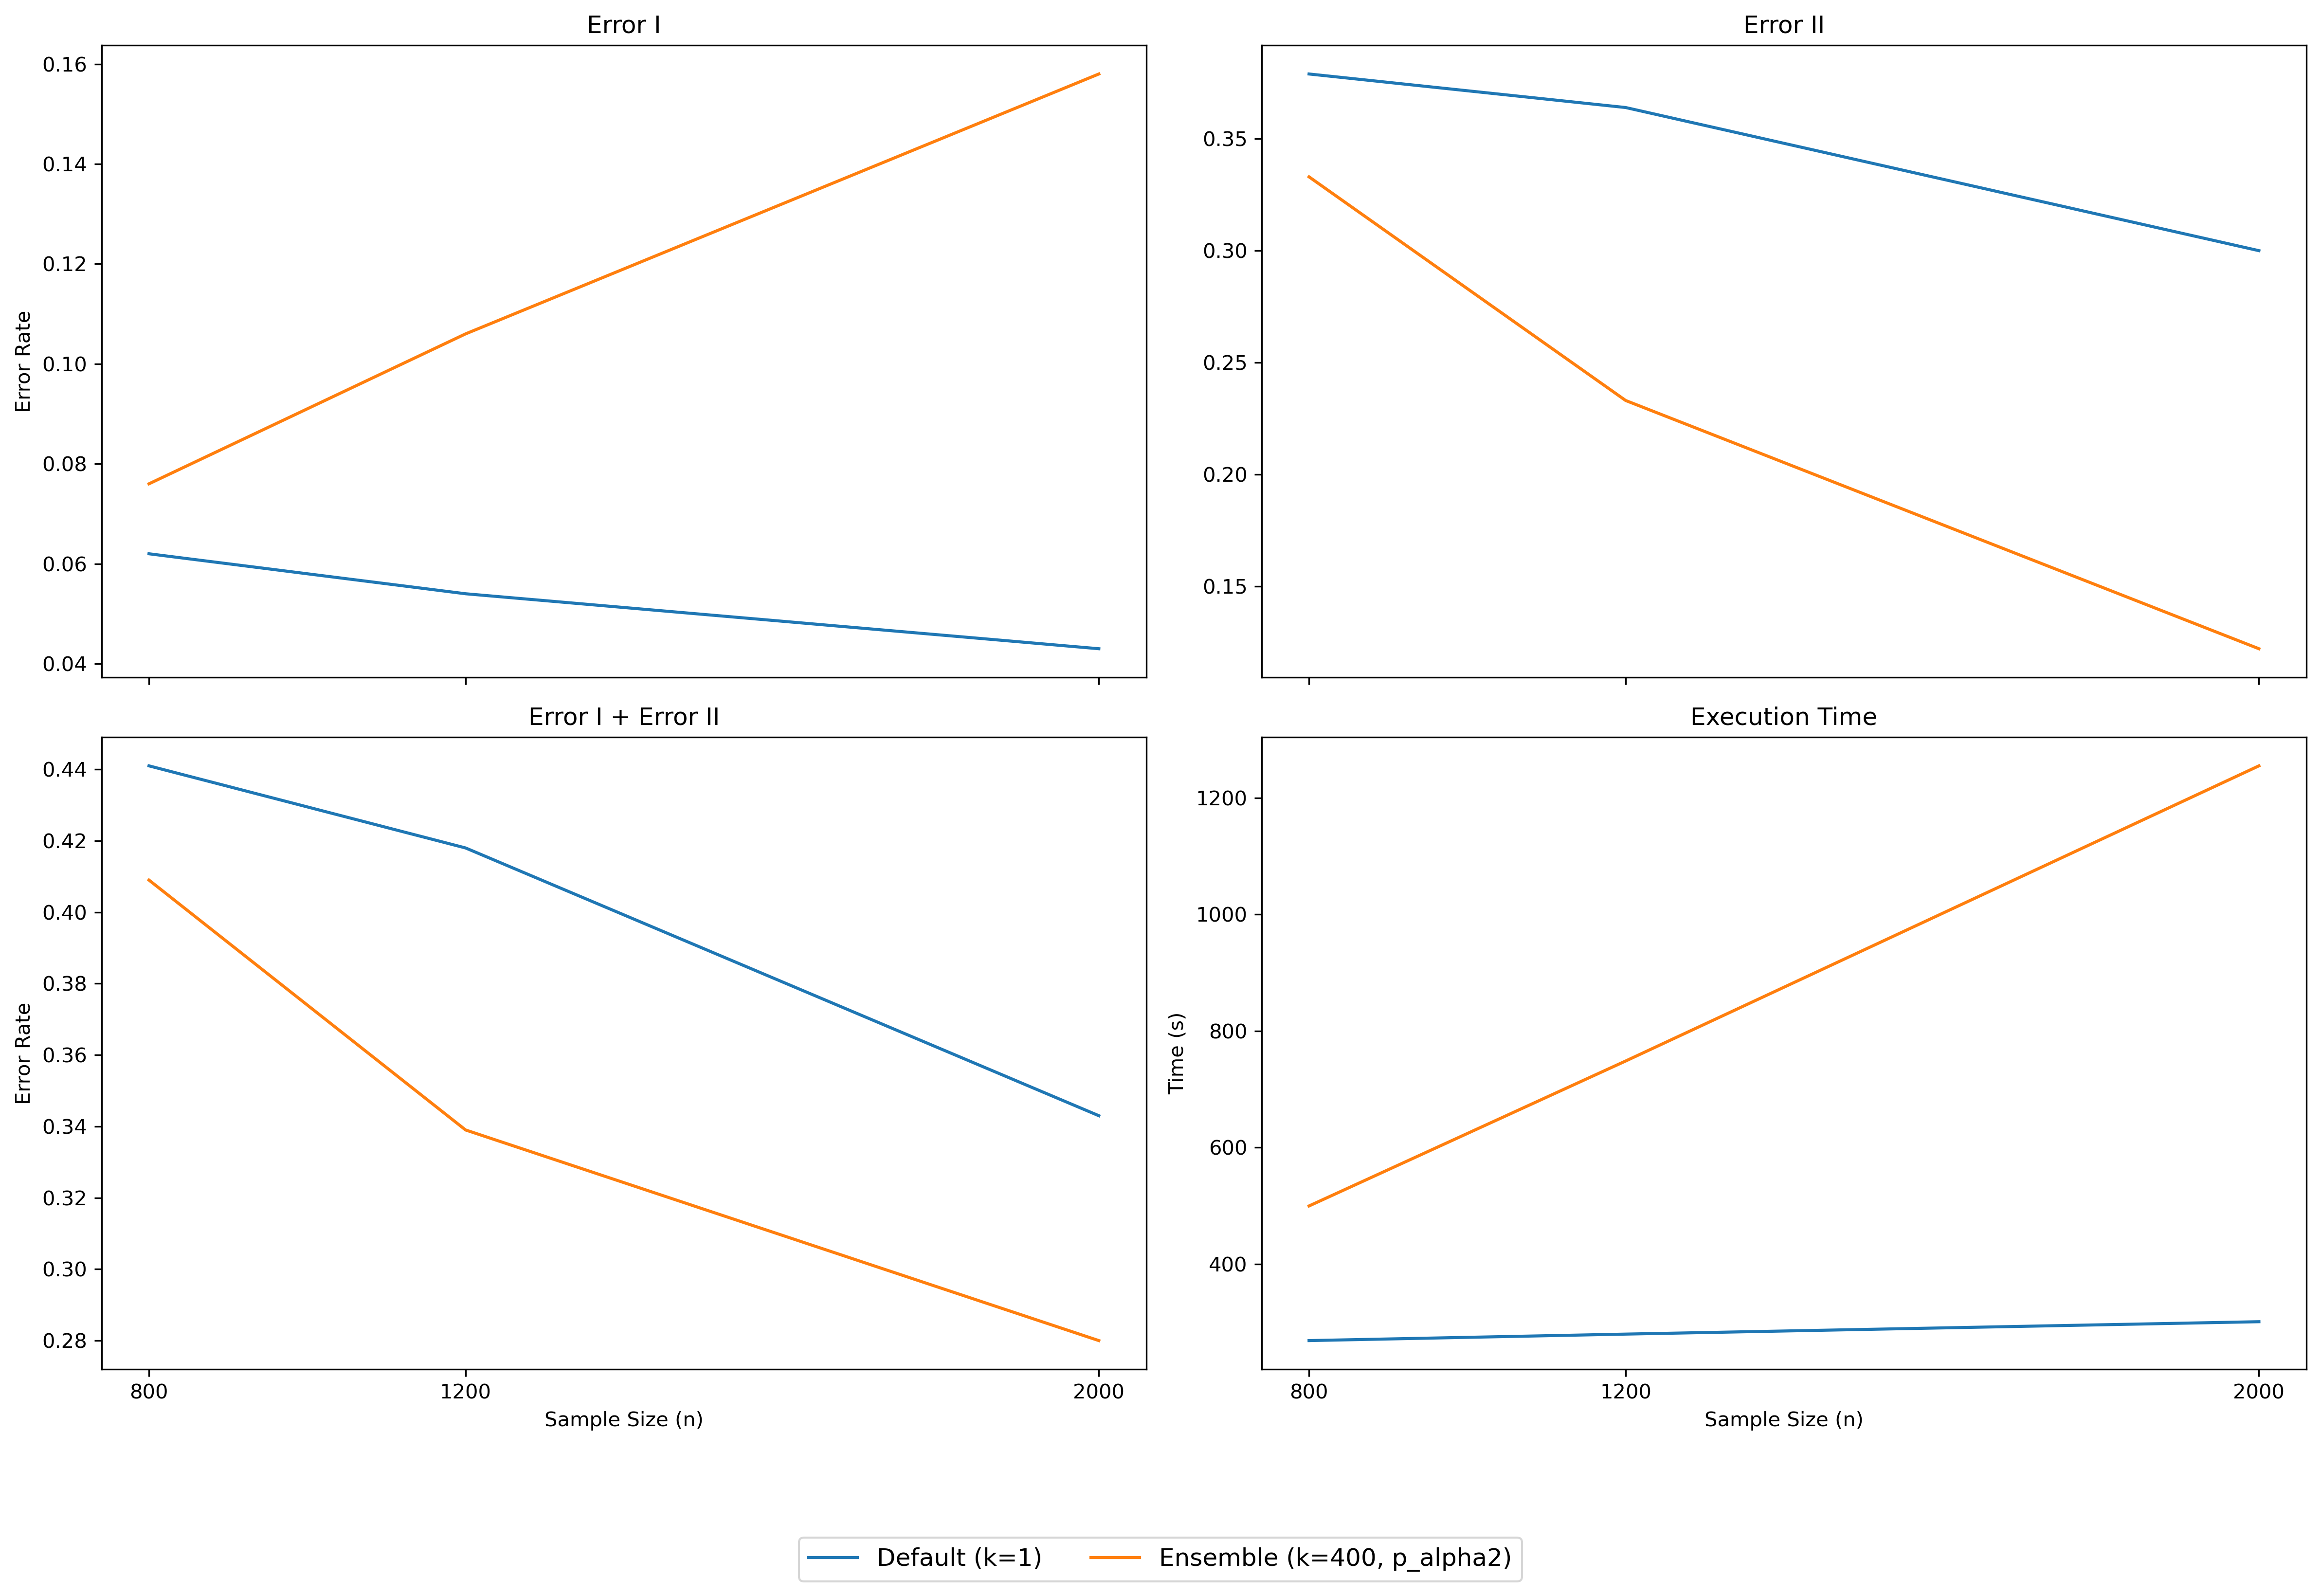

[[[0.062, 0.054, 0.043],
  [0.379, 0.364, 0.3],
  [268.3370621204376, 279.4885239601135, 300.77530097961426]],
 [[0.076, 0.106, 0.158],
  [0.333, 0.233, 0.122],
  [499.5554828643799, 748.47301197052, 1255.3133299350739]]]

In [7]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=4,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=2000: 100%|██████████| 1000/1000 [05:01<00:00,  3.32it/s]


Ensemble (k=400, p_alpha2)


n=2000: 100%|██████████| 1000/1000 [20:57<00:00,  1.26s/it]


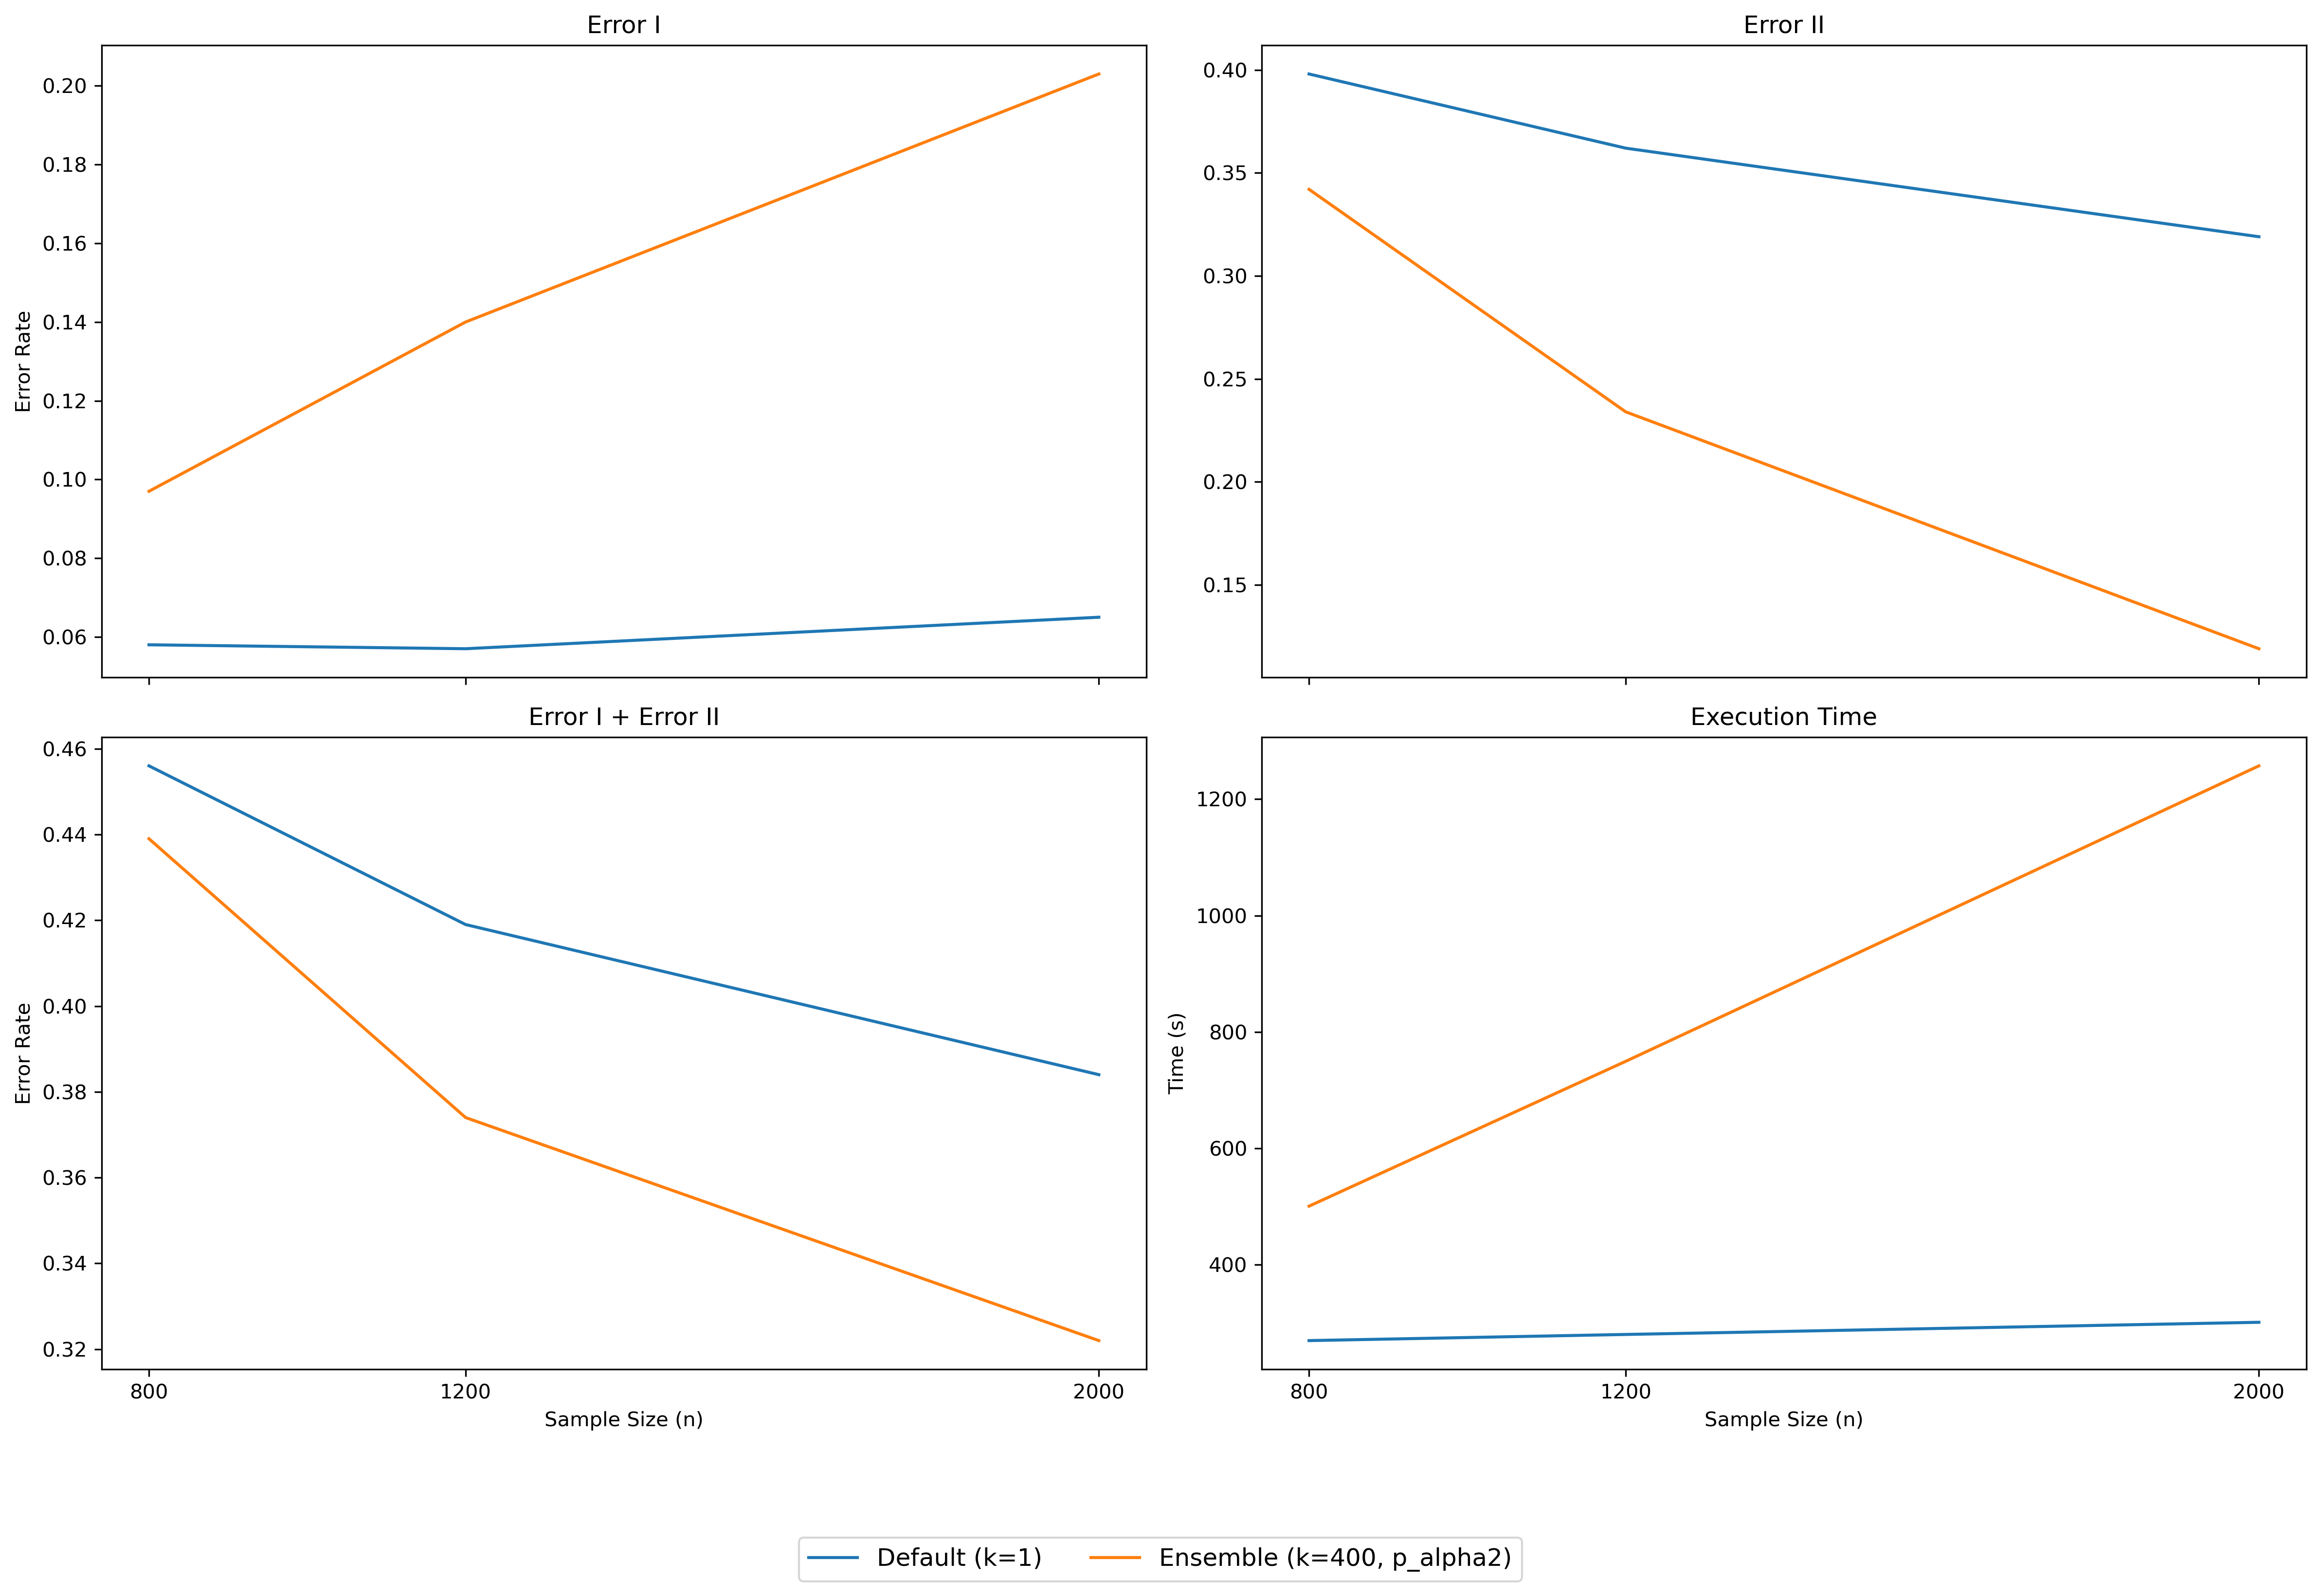

[[[0.058, 0.057, 0.065],
  [0.398, 0.362, 0.319],
  [269.8060290813446, 280.3535418510437, 301.2478919029236]],
 [[0.097, 0.14, 0.203],
  [0.342, 0.234, 0.119],
  [500.76958990097046, 749.5342621803284, 1257.1773591041565]]]

In [8]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=5,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=2000: 100%|██████████| 1000/1000 [05:06<00:00,  3.26it/s]


Ensemble (k=400, p_alpha2)


n=2000: 100%|██████████| 1000/1000 [21:07<00:00,  1.27s/it]


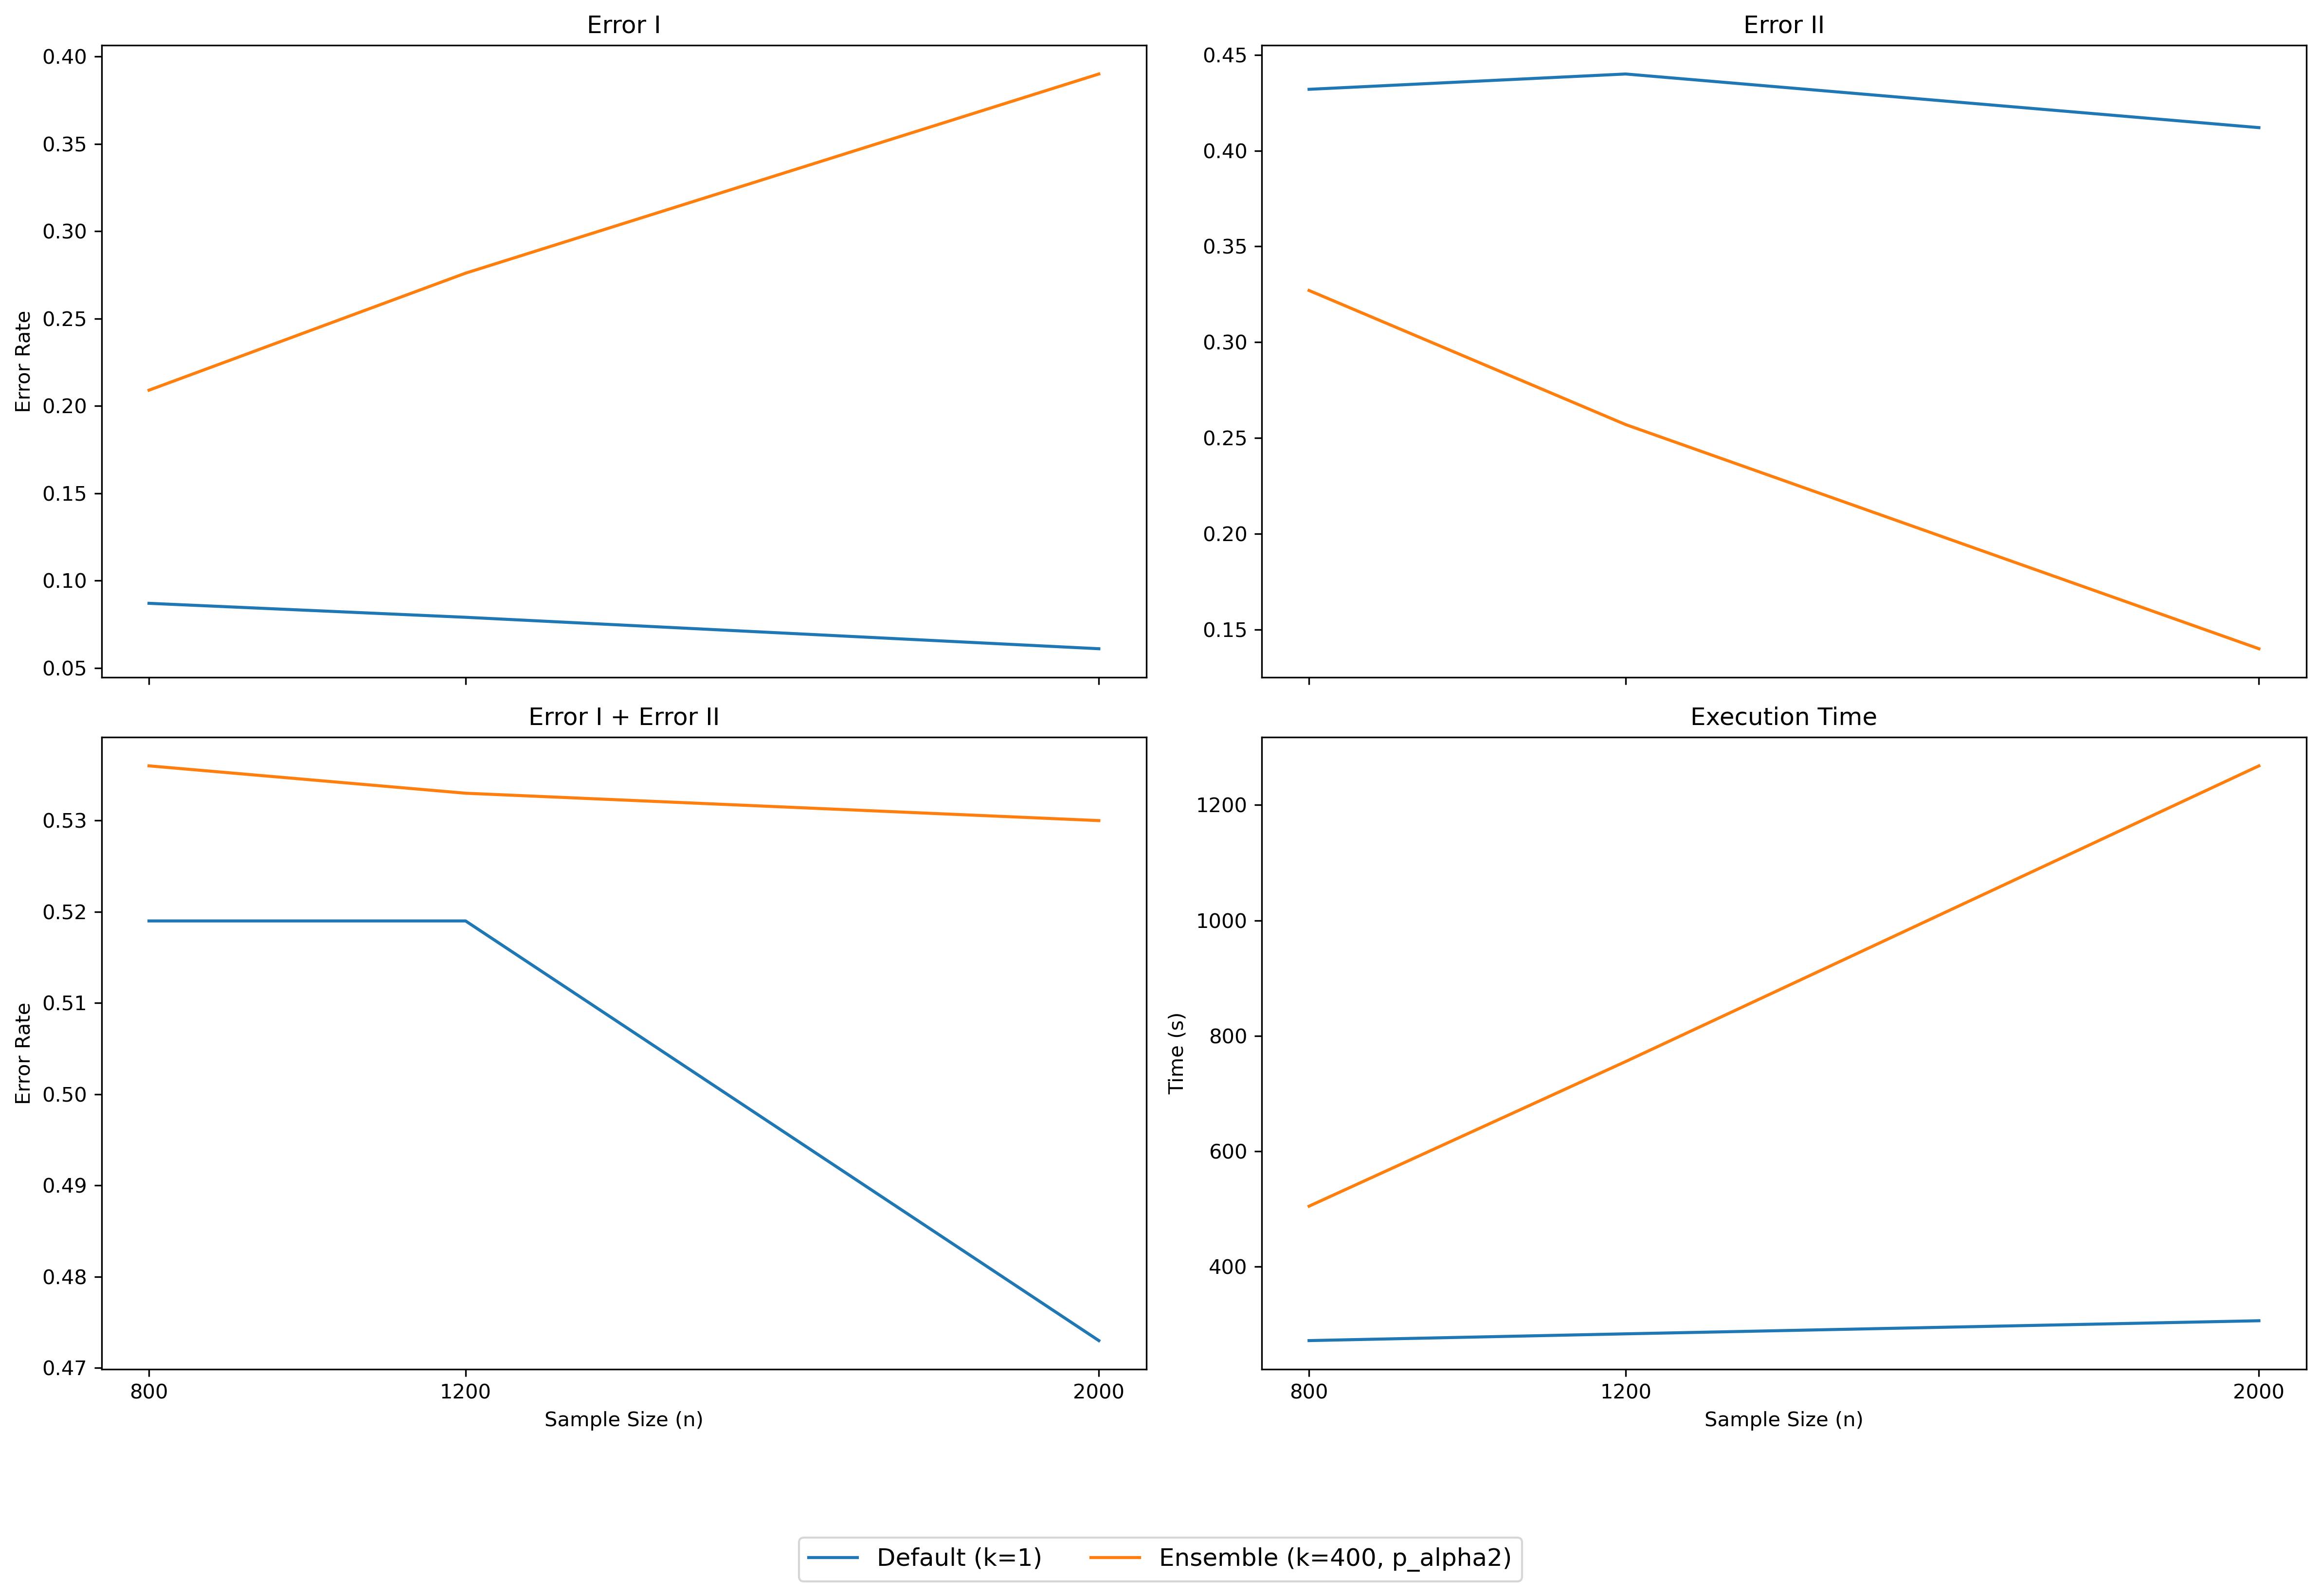

[[[0.087, 0.079, 0.061],
  [0.432, 0.44, 0.412],
  [272.00118923187256, 283.71808791160583, 306.39983105659485]],
 [[0.209, 0.276, 0.39],
  [0.327, 0.257, 0.14],
  [504.91242694854736, 755.5175228118896, 1267.8302793502808]]]

In [9]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=10,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results